# Modelling 

### Final - PreProcessing

In [3]:
# Importing the libraries

# Final - preprocessing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


# visulizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling, stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import math
import sklearn.metrics as sklm
import statsmodels.api as sm

# Model saving
import pickle

In [4]:
# reading the cleaned data
cleaned=pd.read_csv("C:/Users/avakk/Downloads/updatedcv.csv")

In [5]:
cleaned.drop(["url","lat","long","id","model","region"],axis=1,inplace=True)

cleaned.drop(cleaned[cleaned["title_status"]=="parts only"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="missing"].index,inplace=True)
cleaned.drop(cleaned[cleaned["title_status"]=="lien"].index,inplace=True)

cleaned.drop(cleaned[cleaned["price"]<2000].index,inplace=True)
cleaned.drop(cleaned[cleaned["price"]>40000].index,inplace=True)

In [6]:
northeast=["ct","me","ma","nh","ri","vt","nj","ny","pa"]
midwest=["il","in","mi","oh","wi","ia","ks","mn","mo","ne","nd","sd"]
south=["de","fl","ga","md","nc","sc","va","wv","dc","ms","al","ky","tn","ar","tx","ok","la"]
west=["az","co","id","mt","nv","nm","ut","wy","wa","or","hi","ca","az","ak"]

for index, row in cleaned.iterrows():
    if(row["state"] in northeast):
        cleaned.at[index,"state"]="northeast"
    if(row["state"] in midwest):
        cleaned.at[index,"state"]="midwest"
    if(row["state"] in south):
        cleaned.at[index,"state"]="south"
    if(row["state"] in west):
        cleaned.at[index,"state"]="west"

yearmed=cleaned["year"].median()
cleaned["year"].fillna(yearmed)
for index, row in cleaned.iterrows():
    if(row["year"]>2020):
        cleaned.at[index,"year"]=yearmed

In [7]:
# glimpse of the data
cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,west
3,13999,2009.0,ram,good,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,west
4,34500,2017.0,ford,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,west
5,14500,2007.0,gmc,excellent,6 cylinders,gas,89340.0,clean,automatic,4wd,pickup,white,west
6,12500,2013.0,ford,fair,6 cylinders,gas,226031.0,clean,automatic,4wd,pickup,white,west


### Transforming the target variable from skewed to normal distribution

In [8]:
# Applying log tranformation - for normal distribution (rememeber we find it is skewed in EDA)
cleaned["price"]=np.log1p(cleaned["price"])

### Splitting the dataset

In [9]:
# Splitting the data using sklearn for modelling
y=cleaned["price"]
x=cleaned.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Normalization

In [10]:
# Applying normalization for the atrributes to be on same scaling
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin))

C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

### Encoding

In [11]:
# For ordinal - attributes
# Labe encoding
ordinal_columns=["cylinders"]

for col in ordinal_columns:
     le = LabelEncoder()
     le.fit_transform(list(x_train[col].astype(str).values))
     x_train[col] = le.transform(list(x_train[col].astype(str).values))

for col in ordinal_columns:
    le.fit(list(x_test[col].astype(str).values))
    x_test[col] = le.transform(list(x_test[col].astype(str).values))
    
x_cylmin=x_train["cylinders"].min()
x_cylmax=x_train["cylinders"].max()
x_train["cylinders"]=((x_train["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))
x_test["cylinders"]=((x_test["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))

# for nominal attributes - one hot encoding
xx_train=pd.get_dummies(x_train)
xx_test=pd.get_dummies(x_test)

C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\avakk\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [12]:
missing_cols=set(xx_train.columns)-set(xx_test.columns)
for val in missing_cols:
    xx_test[val]=0
    
xx_test=xx_test[xx_train.columns]

In [13]:
xx_train

,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
30231,0.858333,0.833333,0.014914,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
246989,0.916667,0.833333,0.011572,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10076,0.966667,0.833333,0.006349,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
75940,0.916667,0.500000,0.012987,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
38659,0.975000,0.833333,0.009132,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288059,0.966667,0.500000,0.007800,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
407151,0.533333,0.833333,0.008900,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
145780,0.925000,0.833333,0.010886,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
163586,0.933333,0.500000,0.007700,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Metrics

In [79]:
# storing the model metrics (r2, rmse) for further anaysis and comparing the model
acc_train_r2 = []
acc_test_r2 = []
acc_train_rmse = []
acc_test_rmse = []

###  Gradient Boosting Algo - Modelling

In [13]:
# Hyper-Paramter Tuning - Gradient Boositng
def train_GB(est,max_depth,lr):
    params={'n_estimators': est, 'max_depth': max_depth,'learning_rate': lr}
    gb=ensemble.GradientBoostingRegressor(**params)
    gb_model=gb.fit(xx_train,y_train)
    y_pred=gb_model.predict(xx_test)
    ybar=np.sum(y_test)/len(y_test)
    sse = np.sum((y_test-y_pred)**2)  
    sst = np.sum((y_test - ybar)**2) 
    rsq=1-(sse/sst)
    print("{}---> NEstimators{}-MaxDepth{}-LearningRate{}".format(rsq,est,max_depth,lr))

In [14]:
#for n_est in range(450,550,50):
    #for max_depth in range(7,9,1):
        #for lr in [0.05,0.1]:
            #train_GB(n_est,max_depth,lr)

In [ ]:
# Traing the model with the best parametes from abover hyper-paramater tuning
params={'n_estimators': 500, 'max_depth': 8,'learning_rate': 0.1}
gb=ensemble.GradientBoostingRegressor(**params)
gb_model=gb.fit(xx_train,y_train)

In [16]:
# feature Importance of the model
features=pd.DataFrame(gb_model.feature_importances_,index=xx_train.columns)
features["columns"]=features.index
features.index=range(0,len(features))
features.columns=["value","columns"]

print("Feature Importances")
categorical_columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']
for val in categorical_columns:
    p=(features[features["columns"].str.startswith(val)]["value"].sum())/len(features[features["columns"].str.startswith(val)]["value"])
    print("{}>>{}".format(val,p))

for index,row in features.iterrows():
    if(row["columns"]=="odometer"):
        print("Odometer>>{}".format(row["value"]))
    if(row["columns"]=="year"):
        print("Year>>{}".format(row["value"]))

Feature Importances
manufacturer>>0.00124144359424168
condition>>0.00279352544860037
cylinders>>0.08180439984807732
fuel>>0.015950323489950756
title_status>>0.002023469612306788
transmission>>0.0018136198394940646
drive>>0.003709461754458821
type>>0.006230128960768907
paint_color>>0.0004563339992026063
state>>0.0026356108860958057
Year>>0.5273929865704041
Odometer>>0.10642014022634559


In [80]:
# predicting the metrics r2,rmse on test data 

y_pred=gb_model.predict(xx_test)
mse = mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse
print("rmse (Test)={}".format(rmse))

acc_test_rmse.insert(0,rmse)
ybar=np.sum(y_test)/len(y_test)
sse = np.sum((y_test-y_pred)**2)  
sst = np.sum((y_test - ybar)**2) 
rsq=1-(sse/sst)
print("r2 (Test)={}".format(rsq))
acc_test_r2.insert(0,rsq)

rmse (Test)=0.30379214436182767
r2 (Test)=0.8278929918445772


In [81]:
# predicting the metrics r2,rmse on train data 
y_predtr=gb_model.predict(xx_train)

mse = mean_squared_error(y_train,y_predtr)
rmse=sqrt(mse)
rmse
print("rmse (Train)={}".format(rmse))
acc_train_rmse.insert(0,rmse)
ybar=np.sum(y_train)/len(y_train)
sse = np.sum((y_train-y_predtr)**2)  
sst = np.sum((y_train - ybar)**2) 
rsq=1-(sse/sst)
print("r2={} (Train)".format(rsq))

acc_train_r2.insert(0,rsq)

rmse (Train)=0.2797468325450629
r2=0.8543243457905048 (Train)


In [19]:
# Saving the model
pickle.dump(gb_model, open('GradBReg.pkl','wb'))

In [33]:
gb_model=pickle.load(open('GradBReg.pkl', 'rb'))

###  Random Forest - Modelling

In [20]:
# training the random forest model  

from sklearn.ensemble import RandomForestRegressor
def train_RF(est,depth):
    regressor = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=0,n_jobs=-1)
    regressor.fit(xx_train,y_train)
    print('{}>>>>>N Estimators-{}, Max Depth-{}'.format(regressor.score(xx_test, y_test),est,depth))
    
#for est in range(300,500,50):
    #for depth in range(5,8,1):
        #train_RF(est,depth)

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0,n_jobs=-1)
regressor.fit(xx_train,y_train)

In [82]:
y_pred_test = regressor.predict(xx_test)
y_pred_train = regressor.predict(xx_train)

# Metrics
from sklearn import metrics

print('rmse (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("r2 (Test):{}".format(regressor.score(xx_test, y_test)))

print('rmse (Train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("r2 (Train):{}".format(regressor.score(xx_train, y_train)))

acc_train_rmse.insert(1, np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
acc_test_rmse.insert(1, np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
acc_test_r2.insert(1,regressor.score(xx_test, y_test))
acc_train_r2.insert(1,regressor.score(xx_train, y_train))

rmse (Test): 0.28912182652032326
r2 (Test):0.844113956693988
rmse (Train): 0.1451336233811357
r2 (Train):0.9607903742386807


In [42]:
# saving the model
pickle.dump(regressor, open('RandomFReg.pkl','wb'))

In [35]:
regressor=pickle.load(open('RandomFReg.pkl', 'rb'))

### Multiple Regression + Regularization

In [57]:
# Variance Inflation factor (VIF) for finding the multi-collinearity
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [58]:
# Multiple Linear Regression
lreg_fill = LinearRegression()
lreg_fill.fit(xx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Predicting the metrics r2,rmse on test data and train data

y_fill_pred_train = lreg_fill.predict(xx_train)
y_fill_pred_test = lreg_fill.predict(xx_test)
print('rmse (Test) = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_fill_pred_test))))  
print("r2 (Test):{}".format(lreg_fill.score(xx_test, y_test)))
print('rmse (Train): ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_fill_pred_train))))
print("r2 (Train):{}".format(lreg_fill.score(xx_train, y_train)))

acc_train_rmse.insert(2, math.sqrt(sklm.mean_squared_error(y_train, y_fill_pred_train)))
acc_test_rmse.insert(2, math.sqrt(sklm.mean_squared_error(y_test, y_fill_pred_test)))
acc_test_r2.insert(2,lreg_fill.score(xx_test, y_test))
acc_train_r2.insert(2,lreg_fill.score(xx_train, y_train))

rmse (Test) = 0.5062604786468231
r2 (Test):0.5220378269228838
rmse (Train): 0.5031214851693206
r2 (Train):0.5288031822358672


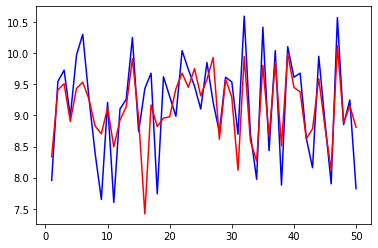

In [60]:
# Comparing the predicted train values and actual train values
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_train[0:50],color="blue",linestyle="-")
plt.plot(c,y_fill_pred_train[0:50],color="red",linestyle="-")

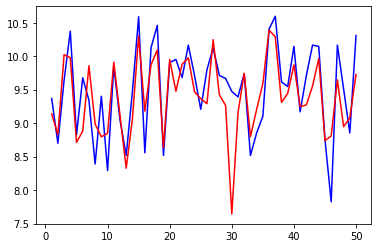

In [61]:
# Comparing the predicted test values and actual test values
c = [i for i in range(1,51,1)]
fig = plt.figure()
plt.plot(c,y_test[0:50],color="blue",linestyle="-")
plt.plot(c,y_fill_pred_test[0:50],color="red",linestyle="-")

In [62]:
pickle.dump(lreg_fill, open('LinReg.pkl','wb'))
lreg_fill=pickle.load(open('LinReg.pkl', 'rb'))

### Ridge

In [15]:
# Hyper-paramter tuning to find the optimum alpha
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(xx_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [18]:
# training the ridge regression model 
from sklearn.linear_model import Ridge
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(xx_train,y_train)

rmse (Test) = 0.50611981309897
r2 (Test):0.5223033956305936
rmse (Train) = 0.5031187460221291
r2 (Train):0.5288083129009837


In [ ]:
y_pred_train_ridge=ridge_mod.predict(xx_train)
y_pred_test_ridge=ridge_mod.predict(xx_test)

print('rmse (Test) = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))) 
print("r2 (Test):{}".format(ridge_mod.score(xx_test, y_test)))
print('rmse (Train) = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge))))
print("r2 (Train):{}".format(ridge_mod.score(xx_train, y_train)))

In [84]:
# inserting the caculated metrics for further analysis
acc_train_rmse.insert(3, math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge)))
acc_test_rmse.insert(3, math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))
acc_test_r2.insert(3,ridge_mod.score(xx_test, y_test))
acc_train_r2.insert(3,ridge_mod.score(xx_train, y_train))

In [22]:
# saving the model
pickle.dump(ridge_mod, open('RidgeReg.pkl','wb'))

### Lasso

In [23]:
# hyper-paramter tuning to find the optimum alpha

from sklearn.linear_model import Lasso
parameters= {'alpha':[1e-8,0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(xx_train,y_train)
print('The best value of Alpha is: ',lasso_reg.best_params_)

C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11108.550668009011, tolerance: 16.817888838978103
  positive)
C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11072.031462730178, tolerance: 16.7929891236536
  positive)
C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11047.983831588535, tolerance: 16.805622213617127
  positive)
C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

The best value of Alpha is:  {'alpha': 1e-08}


C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11869.04018952058, tolerance: 18.01015070429964
  positive)


In [24]:
# training the lasso regression model 
from sklearn.linear_model import Lasso
lasso_mod=Lasso(alpha=1e-8)
lasso_mod.fit(xx_train,y_train)

y_lasso_train=lasso_mod.predict(xx_train)
y_lasso_test=lasso_mod.predict(xx_test)

print('rmse (Test): ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))
print("r2 (Test):{}".format(lasso_mod.score(xx_test, y_test)))
print('rmse (Train): ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print("r2 (Train):{}".format(lasso_mod.score(xx_train, y_train)))

C:\Users\avakk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11869.04018952058, tolerance: 18.01015070429964
  positive)


rmse (Test): 0.5062572406117302
r2 (Test):0.5220439409823665
rmse (Train): 0.5030874820495762
r2 (Train):0.5288668711096942


In [85]:
# inserting the caculated metrics for latter analysis
acc_train_rmse.insert(4, math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))
acc_test_rmse.insert(4, math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test)))
acc_test_r2.insert(4,lasso_mod.score(xx_test, y_test))
acc_train_r2.insert(4,lasso_mod.score(xx_train, y_train))

In [26]:
# saving the model
pickle.dump(lasso_mod, open('LassoReg.pkl','wb'))

### Bagging Regressor

In [27]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
# train the bagging regressor model
bagging = BaggingRegressor()
bag_mod = bagging.fit(xx_train,y_train)

In [28]:
#Bagging Regressor to predict the final Test
bag_test = bag_mod.predict(xx_test)
bag_train = bag_mod.predict(xx_train)

print('rmse (Test):' + str(math.sqrt(sklm.mean_squared_error(y_test, bag_test))))
print("r2 (Test):{}".format(bag_mod.score(xx_test, y_test)))
print('rmse (Train): ' + str(math.sqrt(sklm.mean_squared_error(y_train, bag_train))))
print("r2 (Train):{}".format(bag_mod.score(xx_train, y_train)))

rmse (Test):0.29538547095727
r2 (Test):0.8372864440931441
rmse (Train): 0.15289055570209756
r2 (Train):0.9564871089146791


In [86]:
acc_train_rmse.insert(5, math.sqrt(sklm.mean_squared_error(y_train, bag_train)))
acc_test_rmse.insert(5, math.sqrt(sklm.mean_squared_error(y_test, bag_test)))
acc_test_r2.insert(5,bag_mod.score(xx_test, y_test))
acc_train_r2.insert(5,bag_mod.score(xx_train, y_train))

In [30]:
# saving the model
pickle.dump(bag_mod, open('BagReg.pkl','wb'))

### AVERAGING THE REGRESSORS

In [36]:
# Averaging the regressor models/ bLendig the best models

#GradientBoosting Regressor to predict the final Test
gb_test = gb_model.predict(xx_test)
gb_train = gb_model.predict(xx_train)

# RandomForest Regressor to predict the final Test
rf_test = regressor.predict(xx_test)
rf_train = regressor.predict(xx_train)

#Bagging Regressor to predict the final Test
bag_test = bag_mod.predict(xx_test)
bag_train = bag_mod.predict(xx_train)

In [88]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final_test=(0.4*rf_test+0.3*gb_test+0.3*bag_test )
final_train = (0.4*rf_train+0.3*gb_train +0.3*bag_train)
print('rmse (Test):' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))
acc_test_rmse.insert(6,math.sqrt(sklm.mean_squared_error(y_test, final_test)))
ybar=np.sum(y_test)/len(y_test)
sse = np.sum((y_test-final_test)**2)  
sst = np.sum((y_test - ybar)**2) 
rsq_test=1-(sse/sst)
print("r2 (Test)={}".format(rsq_test))
acc_test_r2.insert(6,rsq_test)

print('rmse (Train):' + str(math.sqrt(sklm.mean_squared_error(y_train, final_train))))
acc_train_rmse.insert(6,math.sqrt(sklm.mean_squared_error(y_train, final_train)))
ybar=np.sum(y_train)/len(y_train)
sse = np.sum((y_train-final_train)**2)  
sst = np.sum((y_train - ybar)**2) 
rsq_train=1-(sse/sst)
print("r2 (Train):{}".format(rsq_train))
acc_train_r2.insert(6,rsq_train)

rmse (Test):0.2798150070125697
r2 (Test)=0.8539883590365813
rmse (Train):0.17102085879546902
r2 (Train):0.9455554030334501


# Models Evaluation

In [115]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 
              'Multiple Regression','Ridge',
                'Lasso', 'BaggingRegressor', 
              'Averaging the Regressors'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [116]:
pd.options.display.float_format = '{:,.2f}'.format

### Investigating Overfitting and Underfitting 

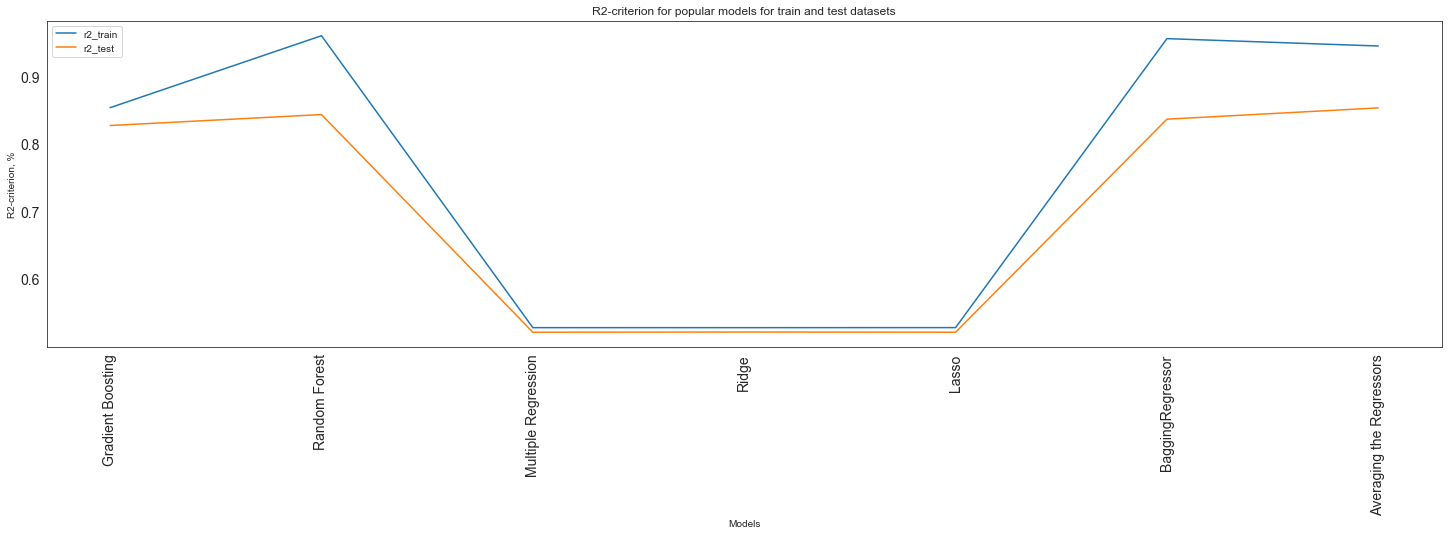

In [117]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

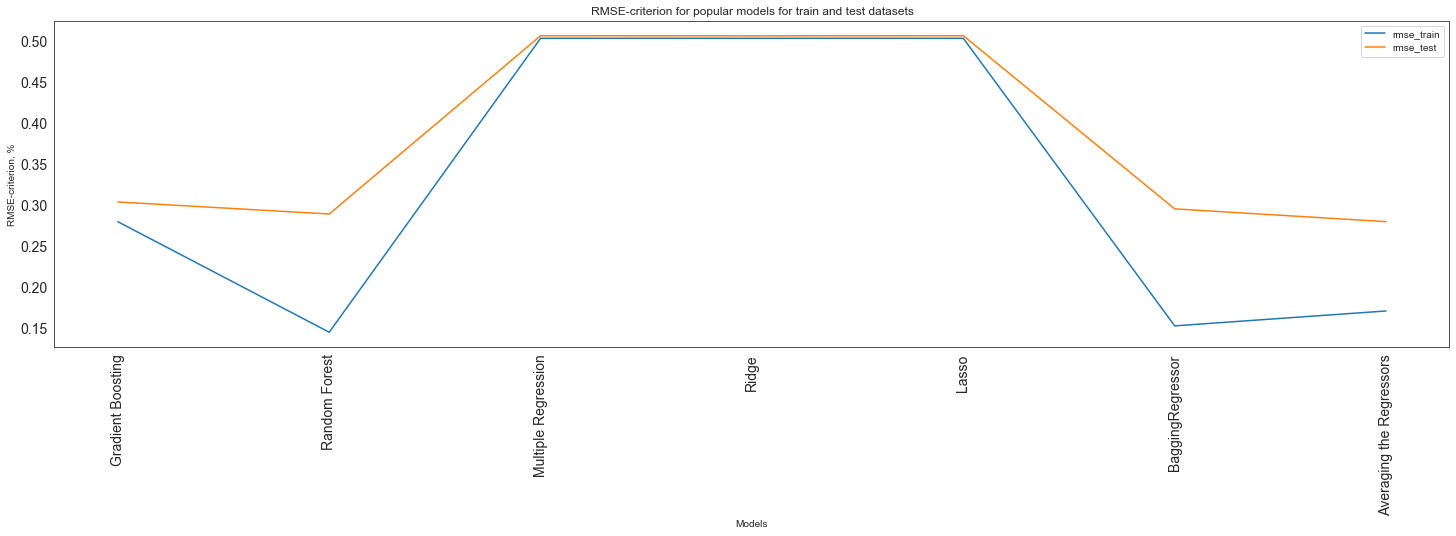

In [118]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE-criterion for popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [119]:
# Converting the data frames scores to dictionary
rmse_test_scores = models[['Model','rmse_test']].set_index('Model')['rmse_test'].to_dict()
rmse_train_scores = models[['Model','rmse_train']].set_index('Model')['rmse_train'].to_dict()

r2_train_scores = models[['Model','r2_train']].set_index('Model')['r2_train'].to_dict()
r2_test_scores = models[['Model','r2_test']].set_index('Model')['r2_test'].to_dict()

### RMSE - Test 

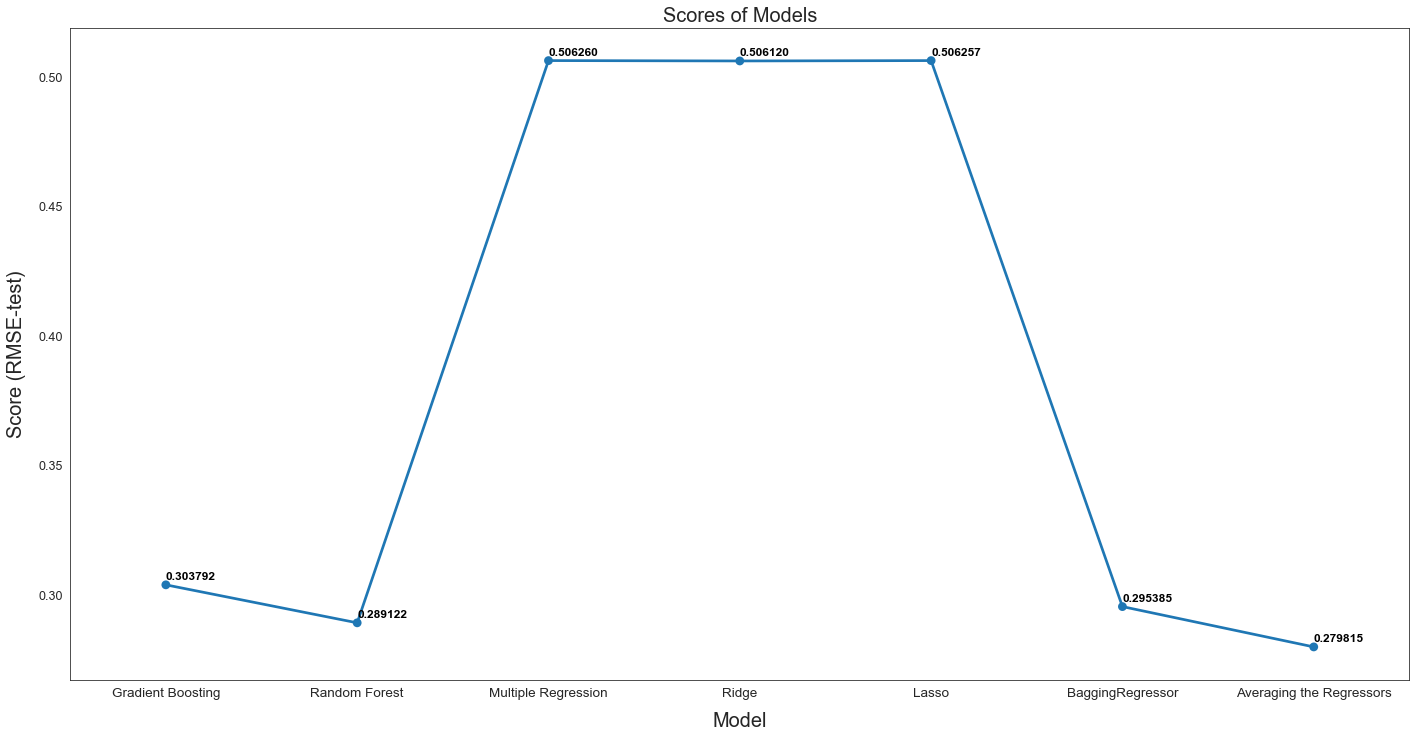

In [120]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(rmse_test_scores.keys(),rmse_test_scores.values()):
    rmse_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_test_scores.keys()), y=[score for score, _ in rmse_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### RMSE - Train

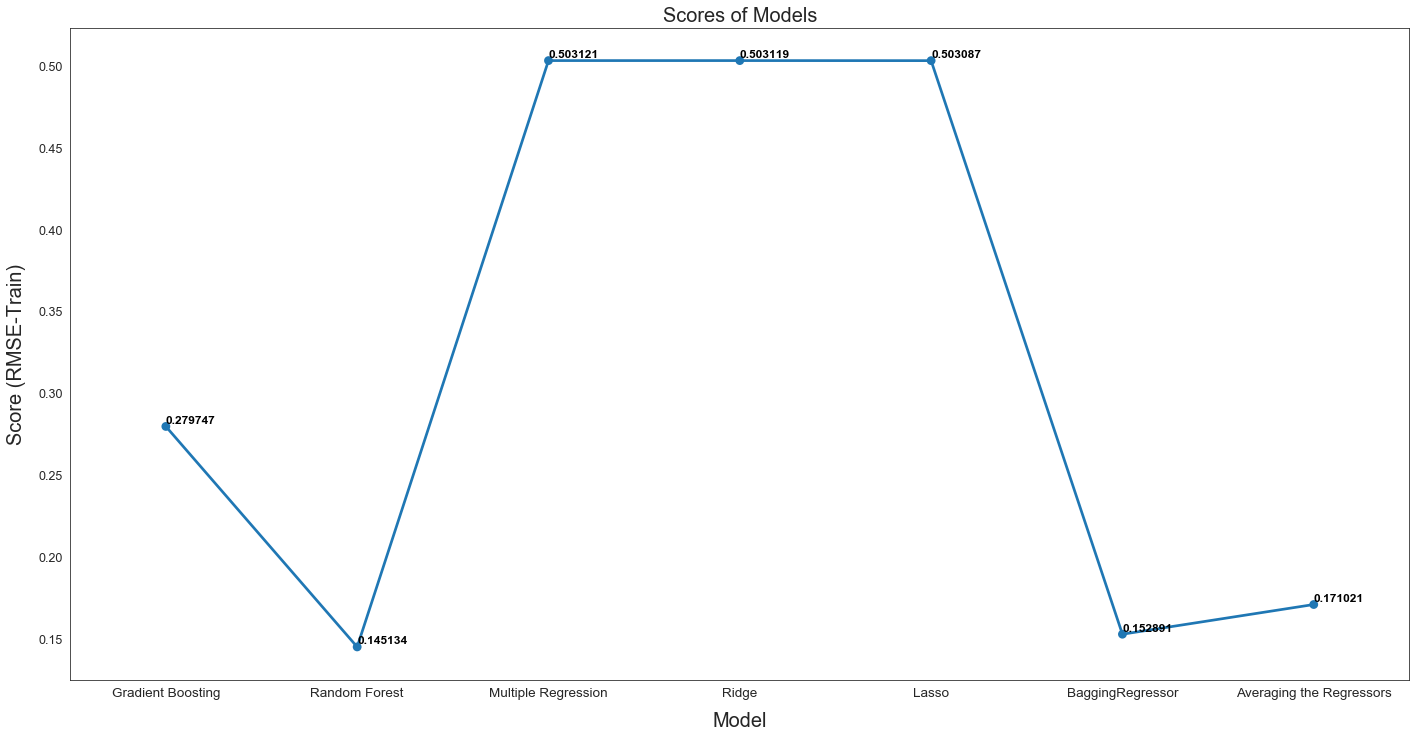

In [121]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(rmse_train_scores.keys(),rmse_train_scores.values()):
    rmse_train_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_train_scores.keys()), y=[score for score, _ in rmse_train_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_train_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-Train)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### R2 - Train 

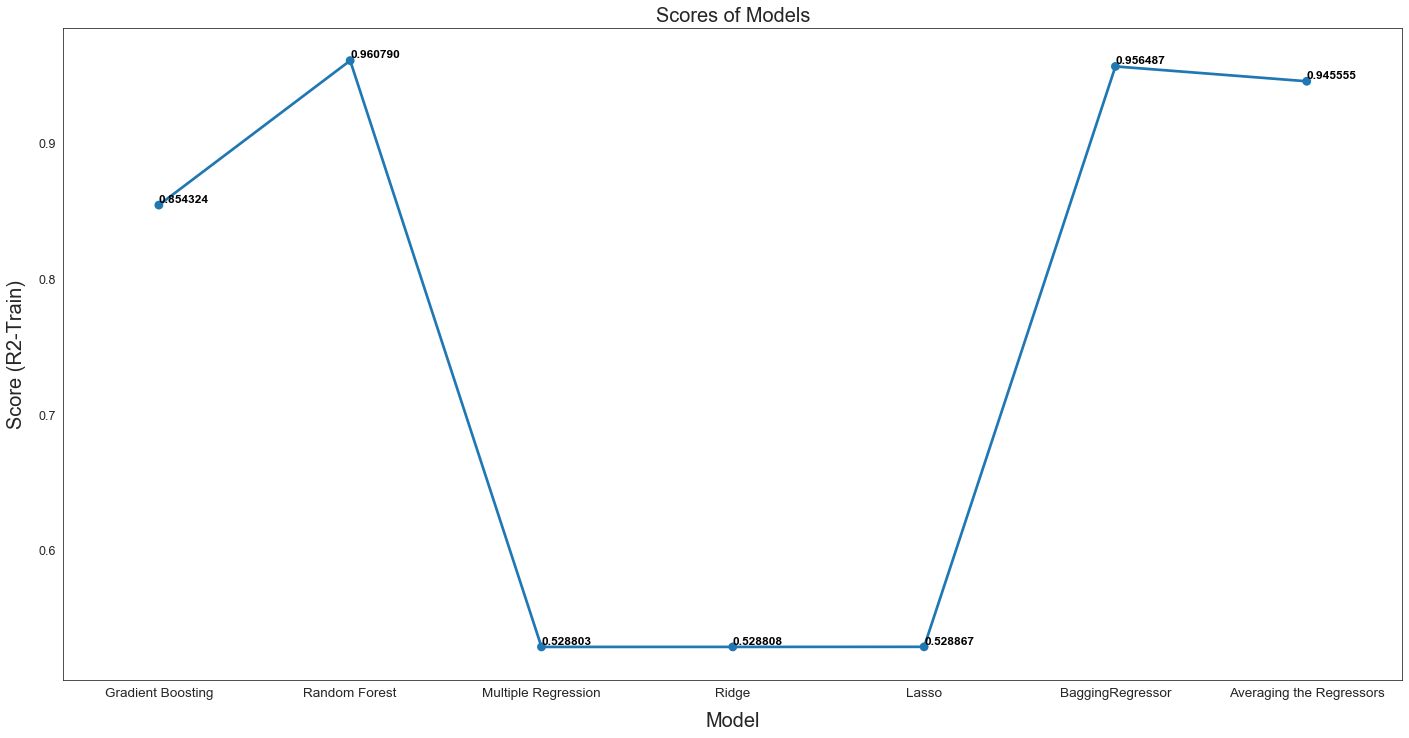

In [122]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(r2_train_scores.keys(),r2_train_scores.values()):
    r2_train_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(r2_train_scores.keys()), y=[score for score, _ in r2_train_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(r2_train_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (R2-Train)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### R2 - test scores

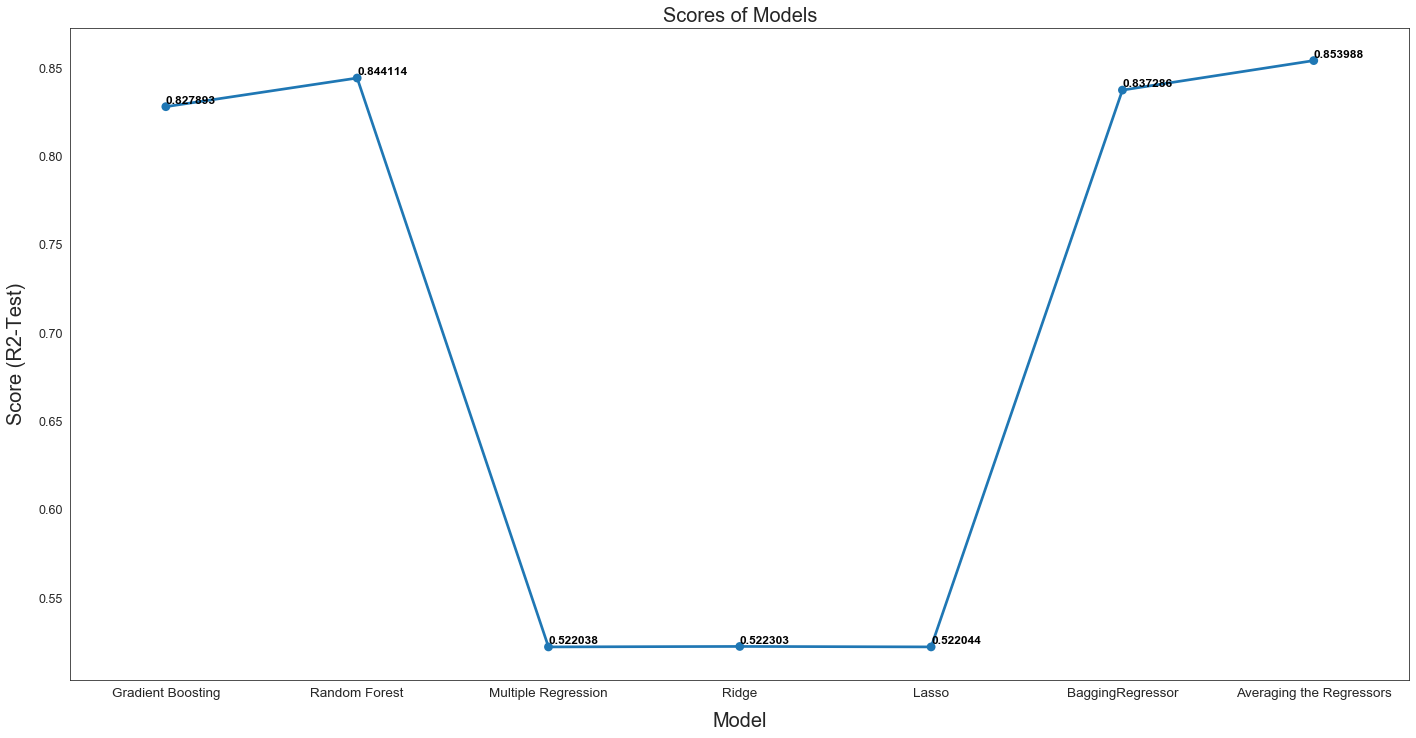

In [112]:
# change the score value to tuple in the dict for plotting purpose
for a,b in zip(r2_test_scores.keys(),r2_test_scores.values()):
    r2_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(r2_test_scores.keys()), y=[score for score, _ in r2_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(r2_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (R2-Test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()